### WARNING
Please refrain from using **print statements/anything that dumps large outputs(>500 lines) to STDOUT** to avoid running to into **memory issues**. 
Doing so requires your entire lab to be reset which may also result in loss of progress and you will be required to reach out to Coursera for assistance with this.
This process usually takes time causing delays to your submission.

### Validate Button
Please note that this assignment uses nbgrader to facilitate grading. You will see a **validate button** at the top of your Jupyter notebook. If you hit this button, it will run tests cases for the lab that aren't hidden. It is good to use the validate button before submitting the lab. Do know that the labs in the course contain hidden test cases. The validate button will not let you know whether these test cases pass. After submitting your lab, you can see more information about these hidden test cases in the Grader Output. <br>
***Cells with longer execution times will cause the validate button to time out and freeze. Please know that if you run into Validate time-outs, it will not affect the final submission grading.*** <br>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

N.B.: I recommend that you use the `statsmodel` library to do the regression analysis as opposed to *e.g.* `sklearn`. The `sklearn` library is great for advanced topics, but it's easier to get lost in a sea of details and it's not needed for these problems.

# 1.  Polynomial regression using MPG data [25 pts, Peer Review]
We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [2]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("data/auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 1a) Clean the data [5 pts] 

1. Fix data types
2. Remove null or undefined values 
3. Drop the column car_name

Replace the data frame with the cleaned data frame. Do not change the column names, and do not add new columns.

Hint: 1. Dtype of one column is incorrect.  

In [3]:
# replace data frame with cleaned data frame
# fix data types, remove null or undefined values, drop the column car_name
# NOTE: do not change the column names or add new columns 
# your code here
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
df = df.dropna()
df = df.drop('car_name',axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [5]:
# this cell will test that you properly cleaned the dataframe 

### 1b) Fit a simple linear regression model with a feature that maximizes $R^2$. [5 pts]
Which feature is the best predictor, and the resulting r-squared value? Update your answer below.

In [6]:
best_predictor=None
best_r_squared=0

# your code here

predictors = [col for col in df.columns if col != 'mpg']

for predictor in predictors:
    
    model = smf.ols(formula=f'mpg ~ {predictor}', data=df).fit()
    
    print(f'{predictor}\t{model.rsquared}')
    
    if model.rsquared > best_r_squared:
        best_r_squared = model.rsquared
        best_predictor = predictor
    
print(best_r_squared)
print(best_predictor)

cylinders	0.6046889889441246
displacement	0.6482294003193044
horsepower	0.6059482578894348
weight	0.6926304331206254
acceleration	0.1792070501562546
model_year	0.33702781330962284
origin	0.3194609386689675
0.6926304331206254
weight


In [7]:
# this cell will test best_predictor and best_r_squared

### 1c) Using the feature found above (without normalizing), fit polynomial regression up to N=10 and report $R^2$. Which polynomial degree gives the best result? [10 pts]
Hint: For N-degree polynomial fit, **you have to include all orders upto N**. Use a for loop instead of running it manually. The `statsmodels.formula.api` formula string can understand **`np.power(x,n)`** function to include a feature representing $x^n$.

For example, the formula for n = 4 ---> mpg ~ weight + np.power(weight,2) + np.power(weight,3) + np.power(weight,4)

In [8]:
# return updated best_degree and best_r_squared 
best_degree = 0
best_r_squared = 0

# your code here

for degree in range (1,11):
    
    formula = 'mpg ~ weight'
    for i in range(2, degree+1):
        formula = formula + f' + np.power(weight, {i})'

        
    model = smf.ols(formula = formula, data = df).fit()
    
    if model.rsquared > best_r_squared:
        best_r_squared = model.rsquared
        best_degree = degree
    
    
    print(f'Degree {degree}, R2: {model.rsquared}')
    

print(best_degree)
print(best_r_squared)

Degree 1, R2: 0.6926304331206254
Degree 2, R2: 0.7151475557845139
Degree 3, R2: 0.715149595486925
Degree 4, R2: 0.7148116456614745
Degree 5, R2: 0.6934461053032286
Degree 6, R2: 0.588807533369212
Degree 7, R2: 0.2964066641980231
Degree 8, R2: -0.28778833738961995
Degree 9, R2: -1.1855766595068777
Degree 10, R2: -2.2860186617215694
3
0.715149595486925


In [9]:
# this cell tests best_degree and best_r_squared 

### 1d) Now, let's make a new feature called 'weight_norm' which is weight normalized by the mean value. [5 pts]
Run training with polynomial models with polynomial degrees up to 20. Print out each polynomial degree and $R^2$ value. What do you observe from the result? What are the best_degree and best_r_qaured just based on $R^2$ value?
Inspect model summary from each model. What is the highest order model that makes sense (fill the value for the sound_degree)? 

Note: For N-degree polynomial fit, you have to include all orders upto N.

In [10]:
best_degree = 0
best_r_squared = 0

df['weight_norm'] = df['weight'] / df['weight'].mean()

# your code here
for degree in range (1,21):
    
    formula = 'mpg ~ weight_norm'
    for i in range(2, degree+1):
        formula = formula + f' + np.power(weight_norm, {i})'

        
    model = smf.ols(formula = formula, data = df).fit()
    
    if model.rsquared > best_r_squared:
        best_r_squared = model.rsquared
        best_degree = degree
    
    
    print(f'Degree {degree}, R2: {model.rsquared}, p:{model.pvalues[-1]}')

print(best_degree)
print(best_r_squared)

sound_degree = 2



Degree 1, R2: 0.6926304331206254, p:6.0152960514345276e-102
Degree 2, R2: 0.7151475557845139, p:5.4291772203291786e-08
Degree 3, R2: 0.7151495954869258, p:0.9579903079042547
Degree 4, R2: 0.7154806032756431, p:0.5026246084834449
Degree 5, R2: 0.7160964869848916, p:0.3607225038954649
Degree 6, R2: 0.7165638483082104, p:0.4260797774621028
Degree 7, R2: 0.7177879568842087, p:0.19762290296456886
Degree 8, R2: 0.7177992979709948, p:0.9013292569714995
Degree 9, R2: 0.7182083307102388, p:0.45694693631950134
Degree 10, R2: 0.7198912805389772, p:0.13111239858031307
Degree 11, R2: 0.7209101742520523, p:0.23959972499772714
Degree 12, R2: 0.7209276395637563, p:0.8776833882286563
Degree 13, R2: 0.7227918788934491, p:0.111681975321609
Degree 14, R2: 0.7240041787167142, p:0.19894746632188537
Degree 15, R2: 0.7238303796561847, p:0.15815040121179944
Degree 16, R2: 0.7242829281892726, p:0.4350265309232739
Degree 17, R2: 0.7243902195110014, p:0.288942466029918
Degree 18, R2: 0.7244188646420426, p:0.19920

In [11]:
# tests best_degree, best_r_squared, and sound_degree

### TODO: 
Open the Peer Review assignment for this week to answer a question for section 1d. 

# 2. Multi-Linear Regression [15 pts, Peer Review]

In the following problem, you will construct a simple multi-linear regression model, identify interaction terms and use diagnostic plots to identify outliers in the data. The original problem is as described by John Verzani in the [excellent tutorial 'SimplR' on the R statistics language](https://cran.r-project.org/doc/contrib/Verzani-SimpleR.pdf) and uses data from the 2000 presidential election in Florida. The problem is interesting because it contains a small number of highly leveraged points that influence the model.

In [12]:
votes = pd.read_csv('data/fl2000.txt', delim_whitespace=True, comment='#')
votes = votes[['county', 'Bush', 'Gore', 'Nader', 'Buchanan']]
votes.describe(include='all')

,county,Bush,Gore,Nader,Buchanan
count,67,67.000000,67.000000,67.000000,67.000000
unique,67,NaN,NaN,NaN,NaN
top,Monroe,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,43450.970149,43453.985075,1454.119403,260.880597
std,NaN,57182.620266,75070.435056,2033.620972,450.498092
min,NaN,1317.000000,789.000000,19.000000,9.000000
25%,NaN,4757.000000,3058.000000,95.500000,46.500000
50%,NaN,20206.000000,14167.000000,562.000000,120.000000
75%,NaN,56546.500000,46015.000000,1870.500000,285.500000


### 2a. Plot a pair plot of the data using the `seaborn` library. [Peer Review]
Upload a screenshot or saved copy of your plot for this week's Peer Review assignment.<br>
**Note:** your code for this section may cause the Validate button to time out. If you want to run the Validate button prior to submitting, you could comment out the code in this section after completing the Peer Review.

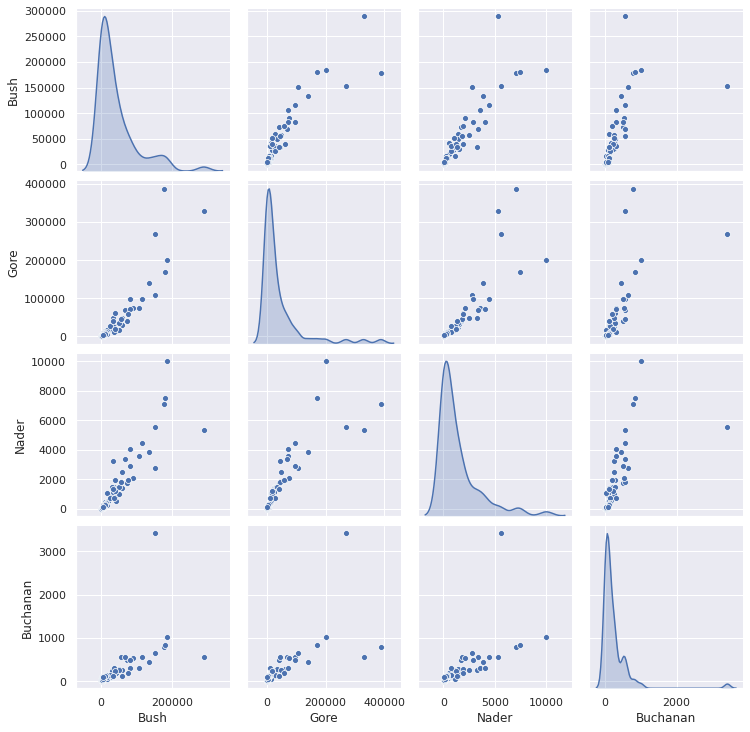

In [13]:
# plot a pair plot of the data using the seaborn library
# possible way to save the image
# plt.savefig('pair_plot.png', dpi = 300, bbox_inches = 'tight')
# your code here
sns.pairplot(votes,diag_kind='kde')


### 2b. Comment on the relationship between the quantiative datasets. Are they correlated? Collinear? [Peer Review]
You will answer this question in this week's Peer Review assignment.

### 2c. Multi-linear [5 pts, Peer Review]

Construct a multi-linear model called `model` without interaction terms predicting the Bush column on the other columns and print out the summary table. You should name your model's object as `model` in order to pass the autograder. Use the full data (not train-test split for now) and do not scale features.

In [14]:
# uncomment and construct a multi-linear model 
# model = 
# your code here
model = smf.ols(formula='Bush ~ Gore + Nader + Buchanan',data=votes).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   Bush   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           1.35e-28
Time:                        03:02:14   Log-Likelihood:                -758.33
No. Observations:                  67   AIC:                             1525.
Df Residuals:                      63   BIC:                             1533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8647.6837   3133.545      2.760      0.0

In [15]:
# tests model

Is there any insignificant feature(s)? Explain your answer in this week's Peer Review assignment. 

### 2d. Multi-linear with interactions [Peer Review]

Construct a multi-linear model with interactions that are statistically significant at the $p = 0.05$ level. You can start with full interactions and then eliminate interactions that do not meet the $p = 0.05$ threshold. You will share your solution in this week's Peer Review assignment. 

Note: Name this model object as **`model_multi`**.

In [16]:
# uncomment and construct multi-linear model 
# model_multi = 

# your code here
full_formula = 'Bush ~ Gore + Nader + Buchanan + Gore:Nader + Gore:Buchanan + Nader:Buchanan'
model_full = smf.ols(formula=full_formula, data=votes).fit()
model_full.summary()

multi_formula = 'Bush ~ Gore + Nader + Buchanan + Gore:Nader + Gore:Buchanan'
model_multi = smf.ols(formula=multi_formula, data=votes).fit()
model_multi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bush   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     162.4
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           6.89e-34
Time:                        03:02:14   Log-Likelihood:                -739.35
No. Observations:                  67   AIC:                             1491.
Df Residuals:                      61   BIC:                             1504.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3700.4305   3067.268     -1.206      0.232   -9833.813    2432.952
Gore              0.8755      0.094      9.298      0.000       0.687       1.064
Nader             7.2320      3.470      2.084      0.041       0.294      14.170
Buchanan         64.6548     26.814      2.411      0.019      11.038     118.272
Gore:Nader    -4.023e-05   1.92e-05     -2.101      0.040   -7.85e-05   -1.93e-06
Gore:Buchanan    -0.0003      0.000     -3.014      0.004      -0.001      -0.000
==============================================================================
Omnibus:                       14.944   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               64.677
Skew:                          -0.144   Prob(JB):                     9.03e-15
Kurtosis:                       7.805   Cond. No.                     8.75e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.75e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# tests model_multi

In [18]:
# tests model_multi 
# your code here

### 2e. Leverage [Peer Review]

Plot the *leverage* vs. the square of the residual.

These resources might be helpful    
- https://rpubs.com/Amrabdelhamed611/669768
- https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_leverage_resid2.html

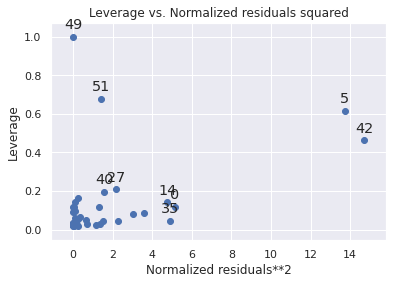

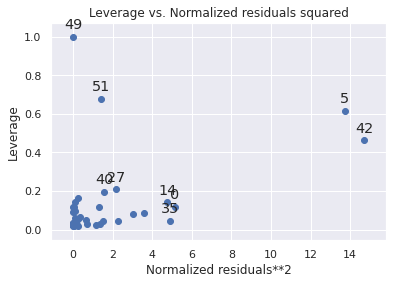

In [19]:
# plot the leverage vs. the square of the residual
# your code here

import statsmodels.graphics.regressionplots as sm_plots

sm_plots.plot_leverage_resid2(model_multi)


In [20]:
# you can use this cell to try different plots 
# your code here

Upload your plot for this week's Peer Review assignment. If you tried out multiple models, upload a single model.

### 2f. Identify and Clean [5pts]

The leverage *vs* residual plot indicates that some rows have high leverage but small residuals and others have high residual. The $R^2$ of the model is determined by the residual. The data is from the disputed 2000 election [where one county](https://en.wikipedia.org/wiki/2000_United_States_presidential_election_recount_in_Florida) caused significant issues.

Display the *3 or more* rows for the points indicated having high leverage and/or high residual squared. You will use this to improve the model $R^2$.

Name the list of indices for those high-leverage and/or high-residual points as `unusual`.

In [21]:
# uncomment and fill unusual with list of indices for high-leverage and/or high-residual points
unusual = []

# your code here
influence = model_multi.get_influence()
leverage = influence.hat_matrix_diag
resid_norm = influence.resid_studentized_internal
resid_norm_squared = resid_norm**2

p = len(model_multi.params)-1
n = len(votes)
leverage_threshold = (p+1)/n
residual_threshold = 3

for i in range(len(votes)):
    if leverage[i] > leverage_threshold or resid_norm_squared[i] > residual_threshold:
        unusual.append(i)
        
print(unusual)

votes.iloc[unusual]

[0, 4, 5, 14, 15, 27, 34, 35, 40, 42, 47, 49, 50, 51, 52, 54, 55, 63]


,county,Bush,Gore,Nader,Buchanan
0,Alachua,34124,47365,3226,263
4,Brevard,115185,97318,4470,570
5,Broward,177902,387703,7104,795
14,Duval,152098,107864,2757,652
15,Escambia,73017,40943,1727,502
27,Hillsborough,180760,169557,7490,847
34,Lee,106141,73560,3587,305
35,Leon,39062,61427,1932,282
40,Marion,55141,44665,1809,563
42,MiamiDade,289533,328808,5352,560


In [22]:
# tests your list of indices for high-leverage and/or high-residual points 

### 2g. Final model [5 pts]

Develop your final model by dropping *one or more* of the troublesome data points indicated in the leverage *vs* residual plot and insuring any interactions in your model are still significant at $p=0.05$. Your model should have an $R^2$ great than 0.95. Call your model `model_final`.

In [23]:
# develop your model_final here
# model_final = 
# your code here

votes_cleaned = votes.drop(unusual[:-6])
#model_multi = smf.ols(formula=multi_formula, data=votes_cleaned).fit()
#model_multi.summary()

final_formula = multi_formula = 'Bush ~ Gore + Nader + Buchanan + Gore:Nader'
model_final = smf.ols(formula=final_formula, data=votes_cleaned).fit()
model_final.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Bush   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           6.94e-31
Time:                        03:02:15   Log-Likelihood:                -569.60
No. Observations:                  55   AIC:                             1149.
Df Residuals:                      50   BIC:                             1159.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    934.4531   1642.884      0.569      0.572   -2365.376    4234.282
Gore           0.5438      0.156      3.481      0.001       0.230       0.858
Nader          9.5540      3.706      2.578      0.013       2.109      16.999
Buchanan      47.9031     16.517      2.900      0.006      14.727      81.079
Gore:Nader -3.579e-05   1.02e-05     -3.508      0.001   -5.63e-05   -1.53e-05
==============================================================================
Omnibus:                       18.264   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.481
Skew:                           1.016   Prob(JB):                     8.85e-08
Kurtosis:                       6.169   Cond. No.                     4.28e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.28e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# tests model_final


## 3. Body Mass Index Model [20 points, Peer Review]

In this problem, you will first clean a data set and create a model to estimate body fat based on the common BMI measure. Then, you will use the **forward stepwise selection** method to create more accurate predictors for body fat.

The body density dataset in file `bodyfat` includes the following 15 variables listed from left to right:
* Density : Density determined from underwater weighing
* Fat : Percent body fat from Siri’s (1956) equation
* Age : Age (years)
* Weight : Weight (kg)
* Height : Height (cm)
* Neck : Neck circumference (cm)
* Chest: Chest circumference (cm)
* Abdomen : Abdomen circumference (cm)
* Hip : Hip circumference (cm)
* Thigh : Thigh circumference (cm)
* Knee : Knee circumference (cm)
* Ankle : Ankle circumference (cm)
* Biceps : Biceps (extended) circumference (cm)
* Forearm : Forearm circumference (cm)
* Wrist : Wrist circumference (cm)

The `Density` column is the "gold standard" -- it is a measure of body density obtained by dunking people in water and measuring the displacement. The `Fat` column is a prediction using another statistical model. The body mass index (BMI) is [calculated as Kg/m^2](https://en.wikipedia.org/wiki/Body_mass_index) and is used to classify people into different weight categories with a [BMI over 30 being 'obese'](https://www.medicalnewstoday.com/info/obesity). You will find that BMI is a poor predictor of the `Density` information it purports to predict. You will try to find better models using measurements and regression.

Unfortunately for us, the dataset we have has imperial units for weight and height, so we will convert those to metric and then calculate the BMI and plot the KDE of the data.

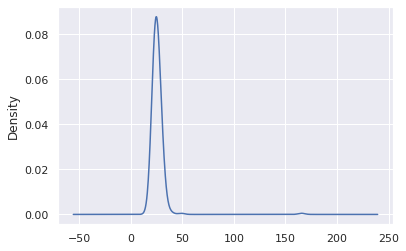

In [25]:
fat = pd.read_csv('data/bodyfat.csv')
fat = fat.drop('Unnamed: 0', axis=1)
fat.Weight = fat.Weight * 0.453592 # Convert to Kg
fat.Height = fat.Height * 0.0254 # convert inches to m
fat['BMI'] = fat.Weight / (fat.Height**2)
fat.BMI.plot.kde();

### 3a. [5 pts]
The BMI has at least one outlier since it's unlikely anyone has a BMI of 165, even [Arnold Schwarzenegger](http://www.health.com/health/gallery/0,,20460621,00.html).

Form a new table `cfat` (cleaned fat) that removes any rows with a BMI greater than 40 and calculate the regression model predicting the `Density` from the `BMI`. Display the summary of the regression model. Call your model as `bmi`. You should achieve an $R^2$ of at least 0.53.

In [26]:
# form new table cfat and model bmi
# cfat = 
# bmi = 
# your code here

cfat = fat[fat.BMI <= 40]

bmi = smf.ols(formula = 'Density ~ BMI', data=cfat).fit()

bmi.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     286.2
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           3.25e-43
Time:                        03:02:16   Log-Likelihood:                 734.17
No. Observations:                 250   AIC:                            -1464.
Df Residuals:                     248   BIC:                            -1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1602      0.006    186.410      0.000       1.148       1.172
BMI           -0.0041      0.000    -16.918      0.000      -0.005      -0.004
==============================================================================
Omnibus:                        2.262   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                2.259
Skew:                           0.229   Prob(JB):                        0.323
Kurtosis:                       2.916   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# tests your bmi model 

### 3b. [Peer Review]
Plot your regression model against the BMI measurement, properly labeling the scatterplot axes and showing the regression line. In subsequent models, you will not be able to plot the Density *vs* your predictors because you will have too many predictors, but it's useful to visually understand the relationship between the BMI predictor and the `Density` because you should find that the regression line goes through the data but there is too much variability in the data to achieve a good $R^2$.
Upload a copy or screensho of your plot for this week's Peer Review assignment. 

Text(0.5, 1.0, 'Body Density vs BMI')

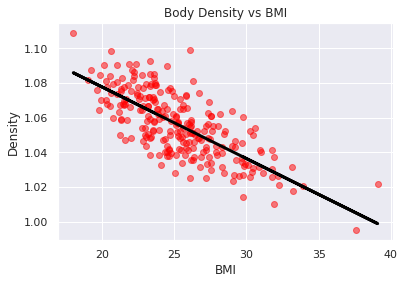

In [28]:
# plot regression model against BMI measurement
# properly label the scatterplot axs and show the regression line
# your code here
plt.scatter(cfat.BMI, cfat.Density, color='red', alpha = 0.5)
plt.plot(cfat.BMI, bmi.predict(cfat), color='black', linewidth=3)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Body Density vs BMI')


 The `BMI` model uses easy-to-measure predictors, but has a poor $R^2 \sim 0.54$. We will use structured subset selection methods from ISLR Chapter 6.1 to derive two better predictors. That chapter covers *best subset*, *forward stepwise* and *backware stepwise* selection. I have implemented the *best subset* selection which searches across all combinations of $1, 2, \ldots, p$ predictors and selects the best predictor based on the $\textit{adjusted}~R^2$ metric. This method involved analyzing $2^{13} = 8192$ regression models (programming and computers for the win). The resulting $\textit{adjusted}~R^2$ plot is shown below (Since the data split can be different, your result may look slightly different):
 
 <img src='fat-best-rsqadj.png'>
 
In this plot, `test_fat` and `train_fat` datasets each containing 200 randomly selected samples were derived from the `cfat` dataset using `np.random.choice` over the `cfat.index` and selected using the Pandas `loc` method. Then, following the algorithm of ISLR Algorithm 6.1 *Best Subset Selection*, all $p \choose k$ models with $k$ predictors were evaluated on the training data and the model returning the best $\textit{Adjusted}~R^2$ was selected. These models are indicated by the data points for the solid blue line. As the text indicates, other measures (AIC, BIC, $C_p$) would be better than the $\textit{Adjusted}~R^2$, but we use it becuase because you've already seen the $R^2$ and should have an understanding of what it means.

Then, the best models for each $k$ were evaluated for the `test_fat` data. These results are shown as the red dots below the blue line. Note that because the test and train datasets are randomly selected subsets, the results vary from run-to-run and it may that your test data produces better $R^2$ than your training data.

In the following exercises, you can not use the `Density`, `Fat` or `BMI` columns in your predictive models. You can only use the 13 predictors in the `allowed_factors` list.

In [29]:
allowed_factors = ['Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist']

## Forward Stepwise Refinement

You will manually perform the steps of the *forward stepwise selection* method for four parameters. You will do this following Algorithm 6.2 from ISLR. For $k = 1\ldots 4$:
* Set up a regression model with $k$ factors that involves the fixed predictors from the previous step $k-1$
* Try all $p$ predictors in the new $k$th position
* Select the best parameter using $\textit{Adjusted}-R^2$ (e.g. `model.rsquared_adj`) given your training data
* Fix the new parameter and continue the process for $k+1$

Then, you will construct a plot similar to the one above, plotting the $\textit{Adjusted}-R^2$ for each of your $k$ steps and plotting the $\textit{Adjusted}-R^2$ from the test set using that model.

### 3c. [5 pts]
First, construct your training and test sets from your `cfat` dataset. Call the resulting data frame to train_fat and test_fat. train_fat includes randomly selected 125 observations and the test_fat has the rest.

Note: Set **random_state = 0** in sklearn's split function

In [30]:
# construct train_fat and test_fat from cfat dataset 
# your code here
from sklearn.model_selection import train_test_split
train_fat, test_fat = train_test_split(cfat, train_size=125, random_state=0)

In [31]:
# tests your training and test sets 

### 3d. Conduct the algorithm above for $k=1$, leaving your best solution as the answer [5 pts]
Call your resulting model `train_bmi1`.

In [32]:
best = ['',0]
for p in allowed_factors:
    model  = smf.ols(formula='Density~'+p, data=train_fat).fit()
    print(p, model.rsquared)
    if model.rsquared>best[1]:
        best = [p, model.rsquared]
print('best:',best)

Age 0.11891818526391695
Weight 0.3118316510507495
Height 0.013604499535144865
Neck 0.2365970437510022
Chest 0.48319067404353544
Abdomen 0.6569981103212716
Hip 0.309611004446523
Thigh 0.20523437265112665
Knee 0.14348108465750553
Ankle 0.08478533257962062
Biceps 0.23065760452385575
Forearm 0.08974003323360791
Wrist 0.10016498175577282
best: ['Abdomen', 0.6569981103212716]


In [33]:
# uncomment and update your solution 
# train_bmi1 = 

# your code here
train_bmi1 = smf.ols(formula=f'Density ~ {best[0]}', data=train_fat).fit()
train_bmi1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     235.6
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           2.32e-30
Time:                        03:02:17   Log-Likelihood:                 380.21
No. Observations:                 125   AIC:                            -756.4
Df Residuals:                     123   BIC:                            -750.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1961      0.009    130.307      0.000       1.178       1.214
Abdomen       -0.0015   9.85e-05    -15.349      0.000      -0.002      -0.001
==============================================================================
Omnibus:                       19.876   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.245
Skew:                           0.686   Prob(JB):                     8.17e-09
Kurtosis:                       5.296   Cond. No.                         821.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# tests train_bmi1 model 

### 3e. Conduct the algorithm above for $k=2$, leaving your best solution as the answer [Peer Review]
Name your model object as `train_bmi2`.<br>
Look at this week's Peer Review assignment for questions about $k=2$ through $k=5$. 

In [35]:
# your code here
k2best = ['',0]
k1best = 'Abdomen'
for p in allowed_factors:
    if p != k1best:
        model  = smf.ols(formula=f'Density~{k1best}+'+p, data=train_fat).fit()
        print(p, model.rsquared)
        if model.rsquared>k2best[1]:
            k2best = [p, model.rsquared]
print('best:',k2best)

train_bmi2 = smf.ols(formula=f'Density ~ {k1best} + {k2best[0]}', data=train_fat).fit()
train_bmi2.summary()

Age 0.6767891697428172
Weight 0.7342533570852783
Height 0.6957487405039494
Neck 0.686436024838784
Chest 0.6802570337998346
Hip 0.7251825596255365
Thigh 0.684182759661941
Knee 0.6938357490638233
Ankle 0.6848076731095345
Biceps 0.6619154153686652
Forearm 0.6753594262291778
Wrist 0.7056567364984301
best: ['Weight', 0.7342533570852783]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           7.81e-36
Time:                        03:02:17   Log-Likelihood:                 396.16
No. Observations:                 125   AIC:                            -786.3
Df Residuals:                     122   BIC:                            -777.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2084      0.008    144.306      0.000       1.192       1.225
Abdomen       -0.0024      0.000    -13.926      0.000      -0.003      -0.002
Weight         0.0009      0.000      5.955      0.000       0.001       0.001
==============================================================================
Omnibus:                       11.620   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.391
Skew:                           0.588   Prob(JB):                      0.00124
Kurtosis:                       4.090   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3f. Conduct the algorithm above for $k=3$, leaving your best solution as the answer [Peer Review]

In [36]:
# your code here
k3best = ['',0]
k2best = 'Weight'

for p in allowed_factors:
    if p != k1best and p != k2best:
        model  = smf.ols(formula=f'Density~{k1best}+{k2best}+'+p, data=train_fat).fit()
        print(p, model.rsquared)
        if model.rsquared>k3best[1]:
            k3best = [p, model.rsquared]
print('best:',k3best)

train_bmi3 = smf.ols(formula=f'Density ~ {k1best} + {k2best} + {k3best[0]}', data=train_fat).fit()
train_bmi3.summary()


Age 0.7349254365619351
Height 0.7346841862930591
Neck 0.7350719549982647
Chest 0.7361527870168976
Hip 0.7403708948984322
Thigh 0.7362390304684195
Knee 0.7342618400367102
Ankle 0.7350977707559927
Biceps 0.7503664765897946
Forearm 0.7354538938929442
Wrist 0.7397169966040411
best: ['Biceps', 0.7503664765897946]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           2.64e-36
Time:                        03:02:17   Log-Likelihood:                 400.07
No. Observations:                 125   AIC:                            -792.1
Df Residuals:                     121   BIC:                            -780.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2348      0.012     98.987      0.000       1.210       1.260
Abdomen       -0.0024      0.000    -14.529      0.000      -0.003      -0.002
Weight         0.0012      0.000      6.548      0.000       0.001       0.002
Biceps        -0.0014      0.001     -2.795      0.006      -0.002      -0.000
==============================================================================
Omnibus:                        6.462   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.977
Skew:                           0.480   Prob(JB):                       0.0504
Kurtosis:                       3.477   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3g. Conduct the algorithm above for $k=4$, leaving your best solution as the answer [Peer Review]

In [37]:
# your code here
k4best = ['',0]
k3best = 'Biceps'
for p in allowed_factors:
    if p != k1best and p != k2best and p != k3best:
        model  = smf.ols(formula=f'Density~{k1best}+{k2best}+{k3best}+'+p, data=train_fat).fit()
        print(p, model.rsquared)
        if model.rsquared>k4best[1]:
            k4best = [p, model.rsquared]
print('best:',k4best)

train_bmi4 = smf.ols(formula=f'Density ~ {k1best} + {k2best} + {k3best} + {k4best[0]}', data=train_fat).fit()
train_bmi4.summary()


Age 0.7506619303391387
Height 0.7529942810139407
Neck 0.7548165068861952
Chest 0.7524724648219933
Hip 0.7552163201542641
Thigh 0.7506114284007718
Knee 0.7504200803560628
Ankle 0.7520403826501314
Forearm 0.7505615613204147
Wrist 0.7586453452817197
best: ['Wrist', 0.7586453452817197]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     94.30
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           4.24e-36
Time:                        03:02:18   Log-Likelihood:                 402.18
No. Observations:                 125   AIC:                            -794.4
Df Residuals:                     120   BIC:                            -780.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1948      0.023     51.329      0.000       1.149       1.241
Abdomen       -0.0024      0.000    -14.362      0.000      -0.003      -0.002
Weight         0.0010      0.000      5.092      0.000       0.001       0.001
Biceps        -0.0016      0.001     -3.068      0.003      -0.003      -0.001
Wrist          0.0030      0.001      2.029      0.045    7.19e-05       0.006
==============================================================================
Omnibus:                        3.832   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                3.311
Skew:                           0.380   Prob(JB):                        0.191
Kurtosis:                       3.240   Cond. No.                     3.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3h. Conduct the algorithm above for $k=5$, leaving your best solution as the answer [Peer Review]

In [38]:
# your code here

k5best = ['',0]
k4best = 'Wrist'
for p in allowed_factors:
    if p != k1best and p != k2best and p != k3best and p!= k4best:
        model  = smf.ols(formula=f'Density~{k1best}+{k2best}+{k3best}+{k4best}+'+p, data=train_fat).fit()
        print(p, model.rsquared)
        if model.rsquared>k5best[1]:
            k5best = [p, model.rsquared]
print('best:',k5best)

train_bmi5 = smf.ols(formula=f'Density ~ {k1best} + {k2best} + {k3best} + {k4best} + {k5best[0]}', data=train_fat).fit()
train_bmi5.summary()


Age 0.7595234065705864
Height 0.7611915781926617
Neck 0.7603260252068301
Chest 0.7600204027067006
Hip 0.7676364281658208
Thigh 0.7586895378986832
Knee 0.7589880040835745
Ankle 0.7628371844347706
Forearm 0.7586455431260074
best: ['Hip', 0.7676364281658208]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Density   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     78.63
Date:                Tue, 11 Mar 2025   Prob (F-statistic):           4.67e-36
Time:                        03:02:18   Log-Likelihood:                 404.55
No. Observations:                 125   AIC:                            -797.1
Df Residuals:                     119   BIC:                            -780.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1362      0.036     31.887      0.000       1.066       1.207
Abdomen       -0.0025      0.000    -14.673      0.000      -0.003      -0.002
Weight         0.0006      0.000      2.147      0.034     4.5e-05       0.001
Biceps        -0.0015      0.001     -3.030      0.003      -0.003      -0.001
Wrist          0.0038      0.001      2.522      0.013       0.001       0.007
Hip            0.0008      0.000      2.146      0.034    6.48e-05       0.002
==============================================================================
Omnibus:                        6.193   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.809
Skew:                           0.432   Prob(JB):                       0.0548
Kurtosis:                       3.606   Cond. No.                     6.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3i. Plot [5 pts]
Plot your resulting $\textit{adjusted}~R^2$ *vs* number of predictors (k=1,2,3,4,5) and overlay the $\textit{adjusted}~R^2$ for the test data. Call the list of the five adjusted r-squared values from the five train_bmi# models as `adjr2_train` and the one from the test data as `adjr2_test`.

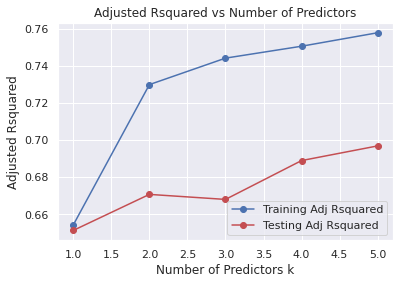

In [39]:
# plot resulting adjusted rsquared vs number of predictors (k=1,2,3,4,5)
# overlay the adjusted rsquared for the test data 
# your code here

adjr2_train = [train_bmi1.rsquared_adj,
                      train_bmi2.rsquared_adj,
                      train_bmi3.rsquared_adj,
                      train_bmi4.rsquared_adj,
                      train_bmi5.rsquared_adj,]

formulas = [f'Density ~ {k1best}',
            f'Density ~ {k1best} + {k2best}',
            f'Density ~ {k1best} + {k2best} + {k3best}',
            f'Density ~ {k1best} + {k2best} + {k3best} + {k4best}',
            f'Density ~ {k1best} + {k2best} + {k3best} + {k4best} + {k5best[0]}',]

adjr2_test = []

for formula in formulas:
    model = smf.ols(formula=formula, data=test_fat).fit().rsquared_adj
    adjr2_test.append(model)

plt.plot(range(1,6), adjr2_train, 'bo-', label='Training Adj Rsquared')
plt.plot(range(1,6), adjr2_test, 'ro-', label='Testing Adj Rsquared')
plt.xlabel('Number of Predictors k')
plt.ylabel('Adjusted Rsquared')
plt.title('Adjusted Rsquared vs Number of Predictors')
plt.legend()

    


In [40]:
# tests adjusted r-squared plot vs. number of factors 

### 3j. Discussion [Peer Review]
The BMI model has the benefit being simple (two measurements, height and wright). Looking at your resulting regression model, how many parameters would you suggest to use for your enhanced BMI model? Justify your answer using your models. Submit your answer with this week's Peer Review assignment. 